# Support Vector Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
y = np.array(y).reshape(-1,1)
dataset.head(5)

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Training the Support Vector Regression model on the Training set

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting the Results

In [6]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([58.53046434, 55.00300106, 65.32070731, 85.1053275 , 83.04307107,
       53.03485658, 91.0907477 , 62.47268557, 66.72370571, 72.8562511 ,
       55.81912956, 81.8057845 , 88.45914708, 96.30023181, 79.04672197,
       54.88597328, 74.06355539, 74.22096319, 79.08607729, 88.41303751])

## Comparing the Real Values with Predicted Values

In [7]:
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,53.454394,58.530464
1,52.721735,55.003001
2,65.101712,65.320707
3,75.392870,85.105327
4,81.436192,83.043071
5,69.899682,53.034857
6,77.768482,91.090748
7,76.617341,62.472686
8,55.165677,66.723706
9,72.111832,72.856251


## Visualising the SVR Results

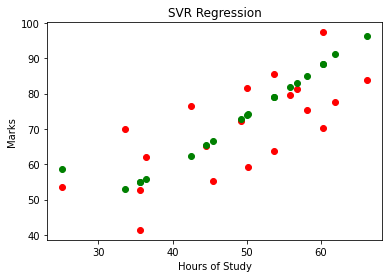

In [8]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

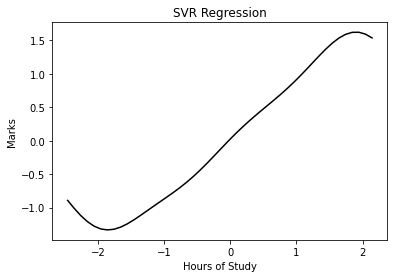

In [9]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()